# АНАЛИЗ ЭФФЕКТИВНОСТИ ДВУХ ВАРИАНТОВ ПОСАДОЧНОЙ СТРАНИЦЫ

Примечание: Данные A/B тестирования уже собраны в файле ab_data_tourist.csv

## План выполнения проекта:

### 1. Проанализируем структуру данных и проведем их предобработку:

- исследуем структуру данных;
- преобразуем столбцы к необходимым типам данных.
- Убедимся в одинаковой длительности проведения A/B-тестирования в каждой из групп. Если длительность разная, унифицируем данные, удалив лишние данные для соответствующей группы.
- Проверим данные на наличие пропусков и избавимся от них, если нужно.
- Проверим, есть ли пользователи, которые в процессе A/B-теста попали в обе группы. Если да, исключим пользователей, оказавшихся в обеих группах.

### 2. Сделаем первичный анализ результатов A/B-тестирования:

Рассчитаем вспомогательные показатели для контрольной и тестовой групп:

- количество посещений сайта;
- суммарное количество совершенных покупок;
- сумма всех покупок.

Сделаем промежуточные выводы по построенной таблице. Сопоставимо ли количество посещений обоих вариантов посадочной страницы? Можно ли говорить о сбалансированности выборок?

В каждой из групп рассчитаем ключевые показатели:

- конверсия;
- средний чек.

Сделаем первичные выводы о результатах A/B-тестирования на основе показателей конверсии и среднего чека в каждой из групп. Определим по какому(-им) показателю(-ям), на первый взгляд, вариант А эффективнее варианта B и наоборот.

Сравним варианты A/B по покупательской способности каждого из туров. Для этого построим сводную таблицу, которая покажет зависимость количества продаж от группы и цены тура. Визуализируем полученную сводную таблицу.

Сделаем выводы по построенной таблице. Определим по каким турам покупательская способность участников группы А выше, чем покупательская способность участников группы B, и наоборот.

### 3. Проанализируем данные на предмет стабилизации метрик:

Сгруппируем данные по дате и группе тестирования и построим таблицу с ежедневными данными результатов проведения A/B-тестирования. В каждой группе вычислим ежедневные показатели:

- количество посещений страницы;
- количество покупок;
- сумму покупок.
- Добавим в таблицу информацию о ежедневной конверсии (ежедневное количество покупок / ежедневное количество посещений) в группе и о ежедневном среднем чеке (ежедневная сумма покупок / ежедневное количество покупок).

Рассчитаем кумулятивные показатели:

- кумулятивное количество посещений страницы;
- кумулятивное количество покупок;
- кумулятивную сумму покупок.

На основе полученных кумулятивных показателей вычислим кумулятивную конверсию и кумулятивный средний чек.

Построим кумулятивные графики конверсии и среднего чека в каждой группе по дням.

Сделаем выводы. Определим: 

- Можно ли назвать A/B-тест завершенным 
- Стабилизировались ли значения метрик во времени 
- Как соотносятся кумулятивные показатели в каждой группе

### 4. Проведем статистический анализ результатов A/B-тестирования:

- Сформулируем статистические гипотезы, соответствующие поставленным бизнес-вопросам, и выберем статистический тест для их проверки.
- Проверим данные на нормальность там, где это необходимо.

С помощью аппарата статистических тестов определим:

- Есть ли статистическая разница между конверсиями в группах А и B
- Есть ли статистическая разница между ежедневными средними чеками в группах А и B

Подкрепите результаты статистических тестов, построив 95 % доверительные интервалы для:

- конверсий в каждой из групп;
- разницы конверсий в группах;
- ежедневного среднего чека в каждой из групп.
- Проинтерпретируем построенные доверительные интервалы для конверсий и ежедневного среднего чека в группах. Определим есть ли перекрытие между доверительными интервалами для групп. Если есть, то определим о чем это говорит

### 5. Сделаем общий вывод по результатам A/B-теста.

На основе всех исследований, определим какой варианта дизайна посадочной страницы более эффективен по метрикам конверсии и ежедневного среднего чека и почему.

### Необходимые библиотеки:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from statsmodels.stats.proportion import proportions_ztest
from functions import t_confidence_interval, proportion_conf_interval, diff_proportion_conf_interval

Наша таблица представлена следующими полями:

* user_id — идентификатор пользователя, зашедшего на сайт;
* data — дата посещения сайта;
* group — группа теста (контрольная — А или тестовая — B);
* purchase — признак покупки: совершил ли пользователь покупку тура (1 — да, 0 — нет);
* price — цена купленного тура (если покупка не состоялась, цена равна 0).

In [2]:
ab_data = pd.read_csv('Data/ab_data_tourist.csv')
ab_data.head()

,user_id,date,group,purchase,price
0,851104,2021-01-21,A,0,0
1,804228,2021-01-12,A,0,0
2,661590,2021-01-11,B,0,0
3,853541,2021-01-08,B,0,0
4,864975,2021-01-21,A,1,150000


# 1. Анализ структуры данных и предобработка

In [3]:
print('Основная информация по данным:')
ab_data.info()
print()

print('Размеры данных:')
print(ab_data.shape)
print()

print('Пропуски в данных:')
print(ab_data.isnull().sum()[ab_data.isnull().sum() > 0])
print()

print('Количество дублирующихся строк:')
print(ab_data.duplicated().sum())

Основная информация по данным:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   user_id   294478 non-null  int64 
 1   date      294478 non-null  object
 2   group     294478 non-null  object
 3   purchase  294478 non-null  int64 
 4   price     294478 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 11.2+ MB

Размеры данных:
(294478, 5)

Пропуски в данных:
Series([], dtype: int64)

Количество дублирующихся строк:
74


Наш датасет состоит из 5 столбцов, без пропусков. Тип признака date требует обработки в datetime. Есть 74 дублирующихся строк, стоит убрать.

In [4]:
# Найти полностью дублирующиеся строки
dupes = ab_data[ab_data.duplicated(keep=False)]

print(f'Количество дублирующихся строк: {dupes.shape[0]}')
print('Примеры дублей:')
print(dupes.sort_values(list(ab_data.columns)).head(20))

Количество дублирующихся строк: 148
Примеры дублей:
        user_id        date group  purchase  price
7691     633793  2021-01-17     B         0      0
10218    633793  2021-01-17     B         0      0
89649    634965  2021-01-05     A         0      0
249854   634965  2021-01-05     A         0      0
231722   643296  2021-01-22     B         0      0
276165   643296  2021-01-22     B         0      0
25439    643820  2021-01-12     A         0      0
256416   643820  2021-01-12     A         0      0
30262    647733  2021-01-13     B         0      0
33751    647733  2021-01-13     B         0      0
154595   661349  2021-01-06     B         0      0
213371   661349  2021-01-06     B         0      0
231232   661480  2021-01-15     B         0      0
268908   661480  2021-01-15     B         0      0
128565   672483  2021-01-23     B         0      0
255625   672483  2021-01-23     B         0      0
10652    686262  2021-01-12     A         0      0
169475   686262  2021-01-12   

Все наши дубли — это одни и те же пользователи, одна и та же дата, та же группа, при этом:
- purchase = 0 (то есть покупка не совершена),
- price = 0.

То есть фактически это дубликаты визитов без покупок, которые никак не влияют на метрики. Стоит их удалить.

In [5]:
# Меняем тип object на datetime
ab_data['date'] = pd.to_datetime(ab_data['date'], format='%Y-%m-%d')
ab_data['date'].info()
# Удаляем дублирование
print(f'Исходный размер: {ab_data.shape}')
ab_data = ab_data.drop_duplicates()
print(f'Размер после удаления дубликатов: {ab_data.shape}')

<class 'pandas.core.series.Series'>
RangeIndex: 294478 entries, 0 to 294477
Series name: date
Non-Null Count   Dtype         
--------------   -----         
294478 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 2.2 MB
Исходный размер: (294478, 5)
Размер после удаления дубликатов: (294404, 5)


In [6]:
print('Диапазоны дат по группам:')
print(ab_data.groupby('group')['date'].agg(['min', 'max']))

Диапазоны дат по группам:
             min        max
group                      
A     2021-01-02 2021-01-24
B     2021-01-02 2021-01-24


По длительности теста, все нормально, даты начала и конца совпадают. Теперь стоит посмотреть на пользователей в обеих группах, чтобы группы были полностью независимы.

In [7]:
user_groups = ab_data.groupby('user_id')['group'].nunique()
multi_group_users = user_groups[user_groups > 1]
print(f'Количество пользователей в обеих группах: {multi_group_users.shape[0]}')

Количество пользователей в обеих группах: 1895


Нашлось 1895 пользователей, который 'видят' группы друг друга, это плохо, т.к. нарушает условия эксперимента. Придется их удалять.

In [8]:
# Список таких пользователей
print(multi_group_users.index[:20])  # первые 20 для примера

# Исключение
bad_users = multi_group_users.index
ab_data = ab_data[~ab_data['user_id'].isin(bad_users)]

Index([630320, 630805, 630871, 630887, 631008, 631337, 631459, 631838, 632069,
       632464, 632592, 632642, 632690, 632794, 633243, 633692, 633897, 633949,
       634098, 634203],
      dtype='int64', name='user_id')


In [9]:
user_groups = ab_data.groupby('user_id')['group'].nunique()
multi_group_users = user_groups[user_groups > 1]
print(f'Количество пользователей в обеих группах: {multi_group_users.shape[0]}')

Количество пользователей в обеих группах: 0


# Вывод:

В ходе этого этапа тип признака date был из изменен на datetime, кроме того, пользователи входящие в обе группы были исключены из экспперимента, проведена проверка на пропуски и длительности эксперимента. Датасет приведен к рабочему состоянию для дальнейшего этапа.

In [10]:
# Сохраним первый этап
ab_data.to_csv('Data/stage_1_ab_data.csv')

## 2. Первичный анализ результатов A/B-тестирования

In [11]:
ab_data = pd.read_csv('Data/stage_1_ab_data.csv')
ab_data['date'] = pd.to_datetime(ab_data['date'], format='%Y-%m-%d')
for c in list(ab_data.columns):
    if c.lower().startswith('unnamed'):
        ab_data = ab_data.drop(columns=c)
ab_data = ab_data.rename(columns={'price': 'revenue'})

In [12]:
# Вспомогательные показатели по группам
summary = ab_data.groupby('group').agg(
        visits=('user_id', 'count'),        # количество визитов
        purchases=('purchase', 'sum'),      # покупки
        revenue_sum=('revenue', 'sum'),     # сумма покупок
)

# Коверсия и средний чек
summary['conversion'] = (summary['purchases'] / summary['visits']) * 100
summary['avg_check'] = summary['revenue_sum'] / summary['purchases']

print(summary)

       visits  purchases  revenue_sum  conversion     avg_check
group                                                          
A      145268      17487   1417780000   12.037751  81076.228055
B      145346      17290   1533010000   11.895752  88664.545980


Баланс трафика составляет:

- A: 145 268 визитов
- B: 145 346 визитов

Разница составляет всего 78 визитов, можно считать, что выборки сбалансированы по размеру.

Количество покупок

- В группе A чуть больше покупок (17 487 против 17 290), но разница незначительная.

Суммарная выручка

- В группе B сумма покупок выше (1 533 млн против 1 418 млн) — уже на этом этапе видно, что пользователи группы B в среднем тратят больше.

Конверсия

- В группе A наблюдается чуть выше конверсия, однако разница небольшая

Средний чек

- Невооруженным взглядом видно, что даже средний чек в группе B выше чем в группе A

Выборки являются сбалансированными.

Сводная таблица покупок по группам и ценам туров:
group       A     B
revenue            
10000    5182  5201
60000    5271  1730
100000   1832  5227
150000   3478  3438
200000   1724  1694


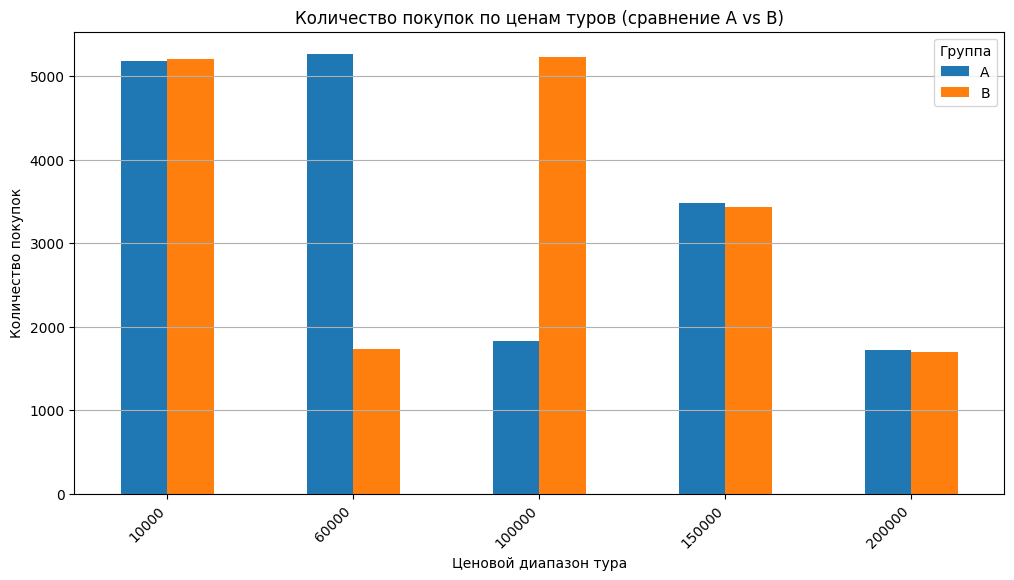

In [13]:
purchases = ab_data[ab_data['purchase'] == 1] # Совершенные покупки
n_unique = purchases['revenue'].nunique() # цены

# Сводная таблица: количество покупок по группам и ценовым интервалам
pivot_price = (
    purchases
    .groupby(['revenue', 'group'])['purchase']
    .count()
    .unstack(fill_value=0)
)

print('Сводная таблица покупок по группам и ценам туров:')
print(pivot_price)

# Визуализация: сгруппированные столбцы
pivot_price.plot(kind='bar', figsize=(12,6))
plt.title('Количество покупок по ценам туров (сравнение A vs B)')
plt.xlabel('Ценовой диапазон тура')
plt.ylabel('Количество покупок')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Группа')
plt.grid(True, axis='y')
plt.show()

Из полученных данных можно сделать некоторые выводы:

- В группе A лучше продаются туры среднего ценового сегмента (60k).

- В группе B лучше продаются дорогие туры (100k).

В крайних сегментах (10k, 150k, 200k) группы практически одинаковы.

Таким образом, именно за счет перевеса в сегменте 100k у группы B формируется более высокий средний чек и больше суммарная выручка, хотя общее количество покупок у нее даже чуть меньше.

# Вывод:

Исходя из данных этого этапа можно сделать промежуточные выводы о том, что группы сбалансированы по трафику, то есть эксперимент проведен корректно. Базовая группа A выигрывает по конверсии, но совсем чуть-чуть. Тестовая группа B выигрывает по среднему чеку и суммарной выручке, в первую очередь за счет бОльшего числа покупок в сегменте дорогих туров (100 000 руб).

В связи с этим, предварительно можно сказать, что вариант B более выгоден для бизнеса, так как приносит больше денег при сопоставимой конверсии.

Примечание: На данном этапе нет смысла сохранять stage_2_csv, т.к внесение изменений в датасет не было.

# 3. Анализ данные на предмет стабилизации метрик

In [14]:
# Ежедневные метрики
daily_data = (
    ab_data
    .groupby(['date', 'group'])
    .agg(
        visits=('user_id', 'count'),
        purchases=('purchase', 'sum'),
        revenue_sum=('revenue', 'sum')
    )
    .reset_index()
    .sort_values(['date','group'])
)

# Ежедневная конверсия и средний чек
daily_data['conversion_daily'] = daily_data['purchases'] / daily_data['visits']
daily_data['avg_check_daily'] = daily_data['revenue_sum'] / daily_data['purchases']

daily_data.head()

,date,group,visits,purchases,revenue_sum,conversion_daily,avg_check_daily
0,2021-01-02,A,2854,359,29410000,0.125788,81922.005571
1,2021-01-02,B,2861,345,29660000,0.120587,85971.014493
2,2021-01-03,A,6595,748,62000000,0.113419,82887.700535
3,2021-01-03,B,6619,754,65960000,0.113914,87480.106101
4,2021-01-04,A,6564,799,64250000,0.121725,80413.016270


In [15]:
# Кумулятивные визиты
daily_data['cum_visits'] = daily_data.groupby('group')['visits'].cumsum()
# Кумулятивные покупки
daily_data['cum_purchases'] = daily_data.groupby('group')['purchases'].cumsum()
# Кумулятивная cумма покупок
daily_data['cum_revenue'] = daily_data.groupby('group')['revenue_sum'].cumsum()
# Кумулятивная конверсия
daily_data['cum_conversion'] = (daily_data['cum_purchases'] / daily_data['cum_visits']) * 100
# Кумулятивный средний чек
daily_data['cum_avg_check'] = daily_data['cum_revenue'] / daily_data['cum_purchases']

display(daily_data.head())

,date,group,visits,purchases,revenue_sum,conversion_daily,avg_check_daily,cum_visits,cum_purchases,cum_revenue,cum_conversion,cum_avg_check
0,2021-01-02,A,2854,359,29410000,0.125788,81922.005571,2854,359,29410000,12.578837,81922.005571
1,2021-01-02,B,2861,345,29660000,0.120587,85971.014493,2861,345,29660000,12.058721,85971.014493
2,2021-01-03,A,6595,748,62000000,0.113419,82887.700535,9449,1107,91410000,11.715525,82574.525745
3,2021-01-03,B,6619,754,65960000,0.113914,87480.106101,9480,1099,95620000,11.592827,87006.369427
4,2021-01-04,A,6564,799,64250000,0.121725,80413.016270,16013,1906,155660000,11.902829,81668.415530


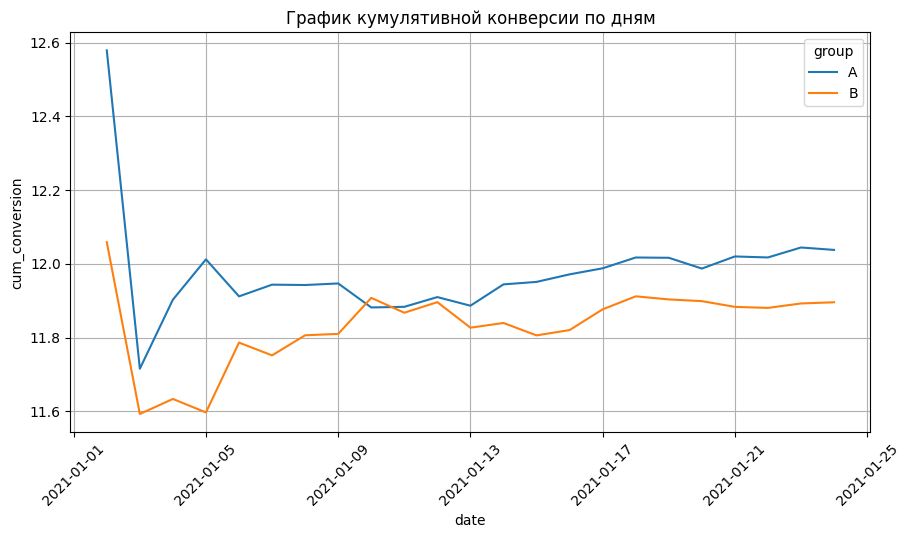

In [16]:
# создаем фигуру размером 8x4
fig = plt.figure(figsize=(8, 4))
# добавляем систему координат
ax = fig.add_axes([1, 1, 1, 1])
# строим lineplot для кумулятивной конверсии во времени в каждой группе
sns.lineplot(
    data=daily_data,
    x='date', 
    y='cum_conversion',  
    hue='group', 
    ax=ax
)
# задаем подпись к графику
ax.set_title('График кумулятивной конверсии по дням')
# задаем поворот меток на оси абсцисс
ax.xaxis.set_tick_params(rotation = 45)
# задаем отображение сетки
ax.grid(True);

# Вывод:

Согласно данным по этому этапу и полученному графику можно сказать, что после 5–7 января кумулятивные кривые сглаживаются и к концу теста (20–24 января) значения стабилизировались:

- Группа A держится немного выше (12.0%),

- Группа B чуть ниже (11.9%).

Таким образом, конверсия в обеих группах стабилизировалась и тест можно считать завершенным. Группа A все время немного лидирует по конверсии, но разрыв очень небольшой.

# 4. Cтатистический анализ результатов A/B-тестирования

Для начала на нормальность проверим ежедневный средней чек отдельно по группам, т.к. распределение в группах может быть разным. Сформулируем гипотезы:

* H0 - выборка ежедневных средних чеков получена из нормального распределения;
* H1 - распределение отличны от нормального.

In [17]:
group_a = daily_data[daily_data['group'] == 'A']
group_b = daily_data[daily_data['group'] == 'B']

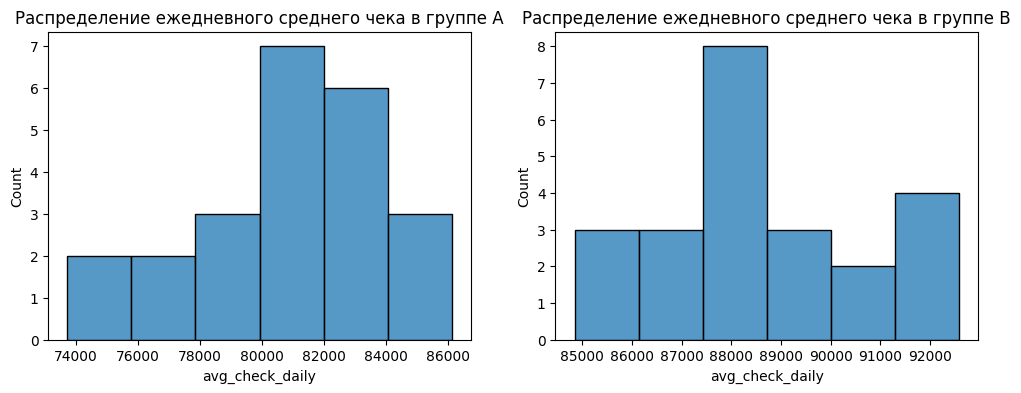

In [18]:
# создаем два графика размером 12x4
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
# строим гистограмму для времени на сайте в каждой группе
sns.histplot(
    data=group_a, 
    x='avg_check_daily',
    ax=axes[0]
)
sns.histplot(
    data=group_b, 
    x='avg_check_daily',
    ax=axes[1]
)
# задаем названия графикам
axes[0].set_title('Распределение ежедневного среднего чека в группе А');
axes[1].set_title('Распределение ежедневного среднего чека в группе B');

Гистограммы напоминают нормальное распределение. Проверим гипотезу о нормальности обоих распределений с помощью теста Шапиро — Уилка.

In [19]:
# уровень значимости
alpha = 0.05 # 95%
# Выполняем тест Шапиро-Уилка
stat, p_value = stats.shapiro(group_a['avg_check_daily'])

print('Тест для группы А')
# Интерпретация результатов
if p_value > alpha:
    print(f'Данные нормально распределены (p-value = {p_value:.4f})')
else:
    print(f'Данные не нормально распределены (p-value = {p_value:.4f})')

# уровень значимости
alpha = 0.05 # 95%
# Выполняем тест Шапиро-Уилка
stat, p_value = stats.shapiro(group_b['avg_check_daily'])

print('Тест для группы B')
# Интерпретация результатов
if p_value > alpha:
    print(f'Данные нормально распределены (p-value = {p_value:.4f})')
else:
    print(f'Данные не нормально распределены (p-value = {p_value:.4f})')

Тест для группы А
Данные нормально распределены (p-value = 0.2531)
Тест для группы B
Данные нормально распределены (p-value = 0.0938)


Таким образом у нас нет оснований отвергнуть нулевую H0 гипотезу - данные о ежедневных средних чеках в обеих группах распределены нормально. Дополнительно, чтобы удостовериться в правильности выбора теста стоит проверить равенство дисперсий с помощью теста Левена.

* H0 - дисперсии в группах ежедневных средних чеков равны;
* H1 - дисперсии в группах различаются.

In [20]:
# уровень значимости
alpha = 0.05 # 95%
# Проверка равенства дисперсий (тест Левена)
stat, p_value = stats.levene(group_a['avg_check_daily'], 
                             group_b['avg_check_daily']
)

print(f'Тест Левена: p-value = {p_value:.4f}')

if p_value > alpha:
    print('Нет оснований отвергать H0: дисперсии равны')
else:
    print('Дисперсии различаются')

Тест Левена: p-value = 0.2617
Нет оснований отвергать H0: дисперсии равны


Проведя дополнительно тест Левена на равенство дисперсий можно с уверенность сказать, что для сравнения ежедневных средних чеков в группах выбираем **классический двухвыборочный t-критерий тест**. Проведем тест для ежедневных средних чеков сравнив статистическую разницу между группами.

* H0 - статистической разницы в группах по ежедневным средним чекам нет;
* H1 - статистическая разница в группах есть.

In [21]:
alpha = 0.05 # уровень значимости
# вычисляем результат T-теста для выборок
results = stats.ttest_ind(
    a=group_a['avg_check_daily'],
    b=group_b['avg_check_daily'],
    alternative='two-sided'
)
print('p-value:', round(results.pvalue, 2))

# сравниваем полученное p-value с уровнем значимости
if(results.pvalue <= alpha):
    print('Отвергаем нулевую гипотезу H_0, принимаем альтернативную!')
else:
    print('Оставляем нулевую гипотезу H_0 не принимаем альтернативную!')

p-value: 0.0
Отвергаем нулевую гипотезу H_0, принимаем альтернативную!


Таким образом разница в средних чеках между группами статистически значима. Группа B имеет более высокий средний чек (что мы видели еще на описательной статистике).

Теперь стоит изучить конверсии покупок и их статистическую разницу. Поскольку это категориальный признак, использую Z-тест для пропорций.

* H0 - статистической разницы в группах по конверсиям покупок нет;
* H1 - статистическая разница в группах по конверсии покупок есть.

In [22]:
purchase_piv = ab_data.groupby('group')['purchase'].agg(
    ['sum', 'count']
)
display(purchase_piv)

,sum,count
group,,
A,17487,145268
B,17290,145346


In [23]:
# уровень значимости
alpha = 0.05

# вычисляем значение p-value для z-теста для пропорций
_, p_value = proportions_ztest(
    count=purchase_piv['sum'], # число пользователей совершивших конверсию (успехов)
    nobs=purchase_piv['count'], # общее число пользователей в группах
    alternative='two-sided'
)

# выводим результат на экран
print(f'p_value: {round(p_value, 3)}')

# сравниваем полученное p-value с уровнем значимости
if(p_value <= alpha):
    print('Отвергаем нулевую гипотезу H_0, принимаем альтернативную!')
else:
    print('Оставляем нулевую гипотезу H_0 не принимаем альтернативную!')

p_value: 0.238
Оставляем нулевую гипотезу H_0 не принимаем альтернативную!


В ходе тестов выяснялось, что статистически значимой разницы по конверсиям между группами A и B не выявлено. Таким образом вероятность покупки у пользователей двух вариантов примерно одинакова.

Далее дополнительно рассмотрим доверительные интервалы с уровнем доверия 95%. Начнем с анализа ежедневного среднего чека. Так как в каждой из групп имеется по 23 наблюдения (23 дня), а истинное стандартное отклонение генеральной совокупности нам неизвестно, для построения доверительных интервалов будем использовать t-распределение (t-интервал).

In [24]:
alpha = 0.05 # Уровень доверия 95%

# Данные по группам
group_a_avg_check = daily_data[daily_data['group'] == 'A']
group_b_avg_check = daily_data[daily_data['group'] == 'B']

# Для группы A
mean_a, lower_a, upper_a = t_confidence_interval(group_a_avg_check['avg_check_daily'], alpha=alpha)
# Для группы B
mean_b, lower_b, upper_b = t_confidence_interval(group_b_avg_check['avg_check_daily'], alpha=alpha)

print(f'Группа A: mean={mean_a:,.2f}, 95% CI [{lower_a:,.2f} - {upper_a:,.2f}]')
print(f'Группа B: mean={mean_b:,.2f}, 95% CI [{lower_b:,.2f} - {upper_b:,.2f}]')

Группа A: mean=80,969.29, 95% CI [79,630.35 - 82,308.22]
Группа B: mean=88,575.72, 95% CI [87,625.83 - 89,525.61]


С 95 % надежность, можно сказать, что интервалы не перекрываются (82 308 < 87 626) таким образом разница средних чеков статистически значима, что полностью согласуется с t-тестом! Переходим к конверсии в каждой из групп и разницей конверсий в группах.

In [25]:
alpha = 0.05 # Уровень доверия 95%

# фильтруем данные группы
purchase_piv = ab_data.groupby('group')['purchase'].agg(
    ['sum', 'count']
)

# Для группы A
p_a, lower_a, upper_a = proportion_conf_interval(
    x_success=purchase_piv.loc['A','sum'],
    n_total=purchase_piv.loc['A','count'],
    alpha=0.05
)

# Для группы B
p_b, lower_b, upper_b = proportion_conf_interval(
    x_success=purchase_piv.loc['B','sum'],
    n_total=purchase_piv.loc['B','count'],
    alpha=0.05
)

print(f'Группа A: p_a={p_a*100:.2f}%, 95% CI [{lower_a*100:.2f}%; {upper_a*100:.2f}%]')
print(f'Группа B: p_b={p_b*100:.2f}%, 95% CI [{lower_b*100:.2f}%; {upper_b*100:.2f}%]')

Группа A: p_a=12.04%, 95% CI [11.87%; 12.21%]
Группа B: p_b=11.90%, 95% CI [11.73%; 12.06%]


In [28]:
# размеры выборок групп А и B
n = [purchase_piv.loc['A','count'], purchase_piv.loc['B','count']]

# конверсии (доли покупок)
pA = purchase_piv.loc['A','sum'] / n[0]
pB = purchase_piv.loc['B','sum'] / n[1]
x_p = [pA, pB]

# строим доверительный интервал для разности пропорций
_, lower_bound, upper_bound = diff_proportion_conf_interval(x_p=x_p, n=n)

# выводим результат
print(f'Доверительный интервал для разности конверсий: [{round(lower_bound*100, 2)}% - {round(upper_bound*100, 2)}%]')

Доверительный интервал для разности конверсий: [-0.38% - 0.09%]


C 95% надежностью, можно сказать, что интервалы конверсий покупок в группах A и B сильно перекрываются, доверительный интервал (CI) для разницы (B - A) включает 0, таким образом разницы в конверсии статистически нет (что совпадает с Z-тестом, p=0.238).

# Вывод:

Проведенные статистические тесты и доверительные интервалы показывают, что по показателю конверсии доверительные интервалы для групп A и B пересекаются, следовательно, статистически значимой разницы между ними нет. Однако по показателю ежедневного среднего чека доверительные интервалы не пересекаются, и разница является значимой: группа B имеет более высокий средний чек. Этот результат подтверждается как результатами t-теста, так и анализом доверительных интервалов.

# 5. Общий вывод по результатам A/B-теста

### Итог для бизнеса:

Проведя анализ A/B тестирования эффективности обоих вариантов посадочной страницы по двум критериям - **конверсии покупки** и **ежедневному среднему чеку** выяснялось, что конверсии покупок между вариантами посадочной странице не отличается, эффективность вариантов по привлечению покупателей одинакова. Однако более высокий средний чек наблюдается в группе B (новый вариант страницы) это означает большую суммарную выручку для бизнеса. Таким образом, вариант дизайна B является более предпочтительным для турагентства, поскольку обеспечивает больший доход при сопоставимой конверсии покупок.